## Simple Linear Regression

This is a Python sklearn implementation of simple linear regression - one input variable, one response variable.

We pass in a public dataset with single input feature and response variables - X and y, respectively. 

##### Dataset Source

The dataset used is one commonly used in examples for linear regression - auto insurance claims in Sweden.
- Original Source: https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt
- Kaggle Source: https://www.kaggle.com/datasets/sunmarkil/auto-insurance-in-sweden-small-dataset?select=insurance.csv

Import pandas as it is my go-to library for Python dataset processing and exploratory data analysis. We will use Seaborn for some basic data visualization plots of the dataset columns. We are going to import Linear Regression model from sklearn and we will import the MSE from the sklearn metrics library.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
autoinsurance_dataset = pd.read_csv("../datasets/autoinsuranceclaims.csv")

The following explains the dataset, taken directly from this source:
- https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt

##### Dataset Explained
- claims (X) = number of claims
- totalpayments (y) = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

Our response variable is predicting the total payment for all claims in Swedish Kronor for a given number of claims. 

Let us get an overview of the dataset, even if it is a simple one.

##### Exploratory Data Analysis

In [3]:
autoinsurance_dataset.head()

,claims,totalpayments
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
autoinsurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   claims          63 non-null     int64  
 1    totalpayments  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


Use pandas describe to obtain basic statistical summary from the input feature data and the response variable data. This will give us counts, mean, standard deviation, and the five-number summary (min, max, median, first quartile, third quartile).

Exploratory data analysis is done before doing any ML algorithm selection and evaluation. In later examples beyond this simple linear regression, data transformations are done to normalize the dataset and ensure it is in a more suitable format for the ML algorithm being used in the notebook.

In [5]:
autoinsurance_dataset.describe()

,claims,totalpayments
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


The following outputs simple histograms to show the distribution of data in the claims and totalpayments column as an example. In later notebooks and ML algorithms in this template library for sklearn, we will use transformations for some feature columns in particular to evaluate performance of ML model before and after transformation tests. Some ML algorithms expect normal data distributions in the data values for that feature column, so keep in mind if suboptimal performance is observed later in ML algorithm test cases.

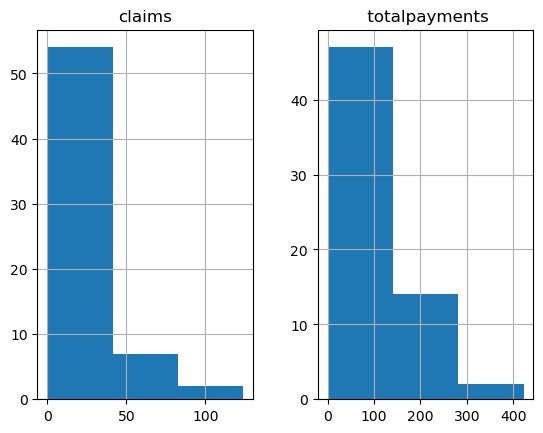

In [6]:
hist = autoinsurance_dataset.hist(bins=3)

In [7]:
X = autoinsurance_dataset.iloc[: , 0:1]

In [8]:
X

,claims
0,108
1,19
2,13
3,124
4,40
...,...
58,9
59,31
60,14
61,53


In [9]:
y = autoinsurance_dataset.iloc[: , -1]

In [10]:
y

0     392.5
1      46.2
2      15.7
3     422.2
4     119.4
      ...  
58     87.4
59    209.8
60     95.5
61    244.6
62    187.5
Name:  totalpayments, Length: 63, dtype: float64

##### Machine Learning Model and Training

Now train the model. You can chain the function calls or do them separately as sklearn examples will show examples of both in their documentation for implementation.

In [11]:
simple_linear_regression_model = LinearRegression().fit(X, y)

The next section calls Score on the model for X input features and y output label. Best score is 1.0 and lowest is 0.0.

Refer to sklearn documentation for details on this function:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [12]:
simple_linear_regression_model.score(X, y)

0.8333466719794502

This next section calculates the model coefficient i.e. B1 in our equation for y = B0 + B1 * X; this defines the slope of our linear regression line.

In [13]:
simple_linear_regression_model.coef_

array([3.41382356])

##### Linear Regression Model: Run Predictions
Now, we run our predictions using our existing training dataset as this is following the sklearn documentation example format. In later notebook examples, we will be following standard ML model training convention of using a train:test split to create our holdout dataset and only running generated ML model predictions on the test dataset i.e. data the ML model has not seen before.

In [14]:
y_pred = simple_linear_regression_model.predict(X)

In [15]:
y_pred

array([388.68743025,  84.8571334 ,  64.37419204, 443.30860721,
       156.54742816, 214.58242868,  98.51242764,  67.7880156 ,
       173.61654596,  54.13272136,  37.06360356, 183.85801664,
        57.54654492,  98.51242764,  43.89125068,  26.82213288,
       101.9262512 ,  40.47742712,  30.23595644,  98.51242764,
        40.47742712,  50.7188978 ,  50.7188978 ,  30.23595644,
       118.995369  ,  43.89125068,  33.64978   ,  88.27095696,
        43.89125068,  33.64978   ,  19.99448576, 105.34007476,
        40.47742712,  37.06360356,  95.09860408,  57.54654492,
       228.23772292,  60.96036848,  33.64978   ,  74.61566272,
        64.37419204, 224.82389936, 159.96125172, 146.30595748,
       207.75478156, 159.96125172,  57.54654492, 112.16772188,
        47.30507424,  30.23595644,  78.02948628,  64.37419204,
        64.37419204,  71.20183916,  47.30507424, 118.995369  ,
       122.40919256, 101.9262512 ,  50.7188978 , 125.82301612,
        67.7880156 , 200.92713444, 108.75389832])

Plot the linear model for claims to total payments.

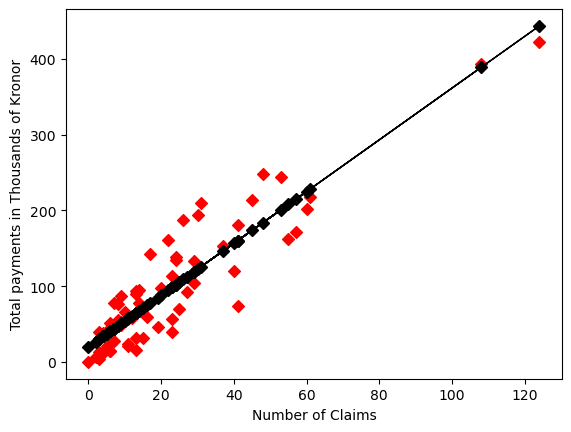

In [16]:
# Plot outputs
# https://matplotlib.org/stable/api/markers_api.html
# https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py
import matplotlib.pyplot as plt
plt.scatter(X, y, color="red", marker="D")
plt.plot(X, y_pred, color="black", marker="D", linewidth=1)
plt.xlabel("Number of Claims")
plt.ylabel("Total payments in Thousands of Kronor")
plt.show()

#### Web References
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/